A frame with the name 'BPL' is already registered. Overriding


                Time                      Azim    Elev    Distance   Radial Velocity
AOS     2023-06-15T19:59:22.818542 UTC  176.82    0.00    2327.44   -5264.31
        2023-06-15T19:59:22.963664 UTC  176.81    0.01    2326.68   -5263.02
        2023-06-15T19:59:52.963664 UTC  173.02    1.44    2173.10   -4964.20
        2023-06-15T20:00:22.963664 UTC  168.66    2.89    2029.57   -4590.86
        2023-06-15T20:00:52.963664 UTC  163.65    4.31    1898.55   -4127.47
        2023-06-15T20:01:22.963664 UTC  157.92    5.68    1782.97   -3558.97
        2023-06-15T20:01:52.963664 UTC  151.43    6.92    1686.17   -2874.63
        2023-06-15T20:02:22.963664 UTC  144.20    7.94    1611.67   -2073.97
        2023-06-15T20:02:52.963664 UTC  136.36    8.65    1562.74   -1173.23
        2023-06-15T20:03:22.963664 UTC  128.14    8.97    1541.92    -208.51
MAX     2023-06-15T20:03:29.984934 UTC  126.20    8.98    1541.26      21.14
        2023-06-15T20:03:52.963664 UTC  119.85    8.85    1550.36   

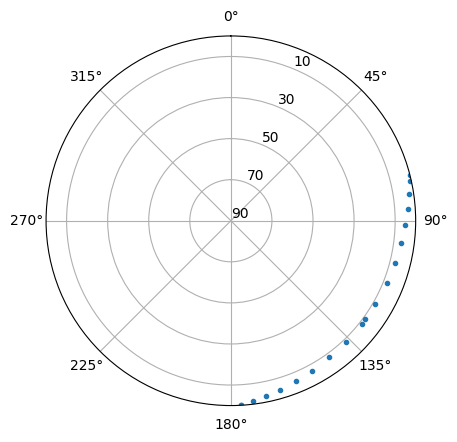

2023-06-15T19:11:23.709663 UTC
BPL


In [2]:

import sys
import numpy as np
import matplotlib.pyplot as plt

from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.config import config


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

# Station definition
station = create_station('BPL', ( 37.8059,144.9514, 0))
azims, elevs = [], []

print("                Time                      Azim    Elev    Distance   Radial Velocity")
print("====================================================================================")

for orb in station.visibility(tle, start=Date.now(), stop=timedelta(hours=24), step=timedelta(seconds=30), events=True):
    elev = np.degrees(orb.phi)
    # Radians are counterclockwise and azimuth is clockwise
    azim = np.degrees(-orb.theta) % 360

    # Archive for plotting
    azims.append(azim)
    # Matplotlib actually force 0 to be at the center of the polar plot,
    # so we trick it by inverting the values
    elevs.append(90 - elev)

    r = orb.r / 1000.
    print("{event:7} {orb.date} {azim:7.2f} {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
        orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
    ))

    if orb.event and orb.event.info.startswith("LOS"):
        # We stop at the end of the first pass
        print()
        break

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.plot(np.radians(azims), elevs, '.')
ax.set_yticks(range(0, 90, 20))
ax.set_yticklabels(map(str, range(90, 0, -20)))
ax.set_rmax(90)

if "no-display" not in sys.argv:
    plt.show()
    print(Date.now())
    print(station)
     

A frame with the name 'BPL' is already registered. Overriding


AOS      2023-06-18T00:32:27.636087 UTC   239.12     0.00    2330.67   -6606.63
MAX      2023-06-18T00:37:38.437459 UTC   313.69    29.19     777.05       2.31
LOS      2023-06-18T00:42:49.955946 UTC    28.45    -0.00    2333.24    6590.36


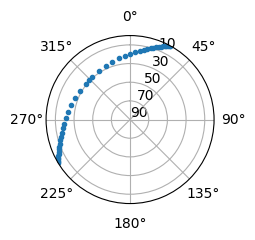

AOS      2023-06-18T02:13:46.126311 UTC   313.42     0.00    2333.14   -1621.68
MAX      2023-06-18T02:15:07.428385 UTC   328.27     0.61    2266.27       0.81
LOS      2023-06-18T02:16:28.799941 UTC   343.13    -0.00    2333.27    1620.58


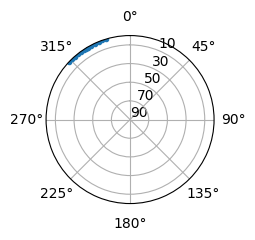

AOS      2023-06-18T07:10:28.662258 UTC     9.08     0.00    2332.66   -2602.05
MAX      2023-06-18T07:12:38.488993 UTC    33.19     1.64    2156.60      -2.07
LOS      2023-06-18T07:14:48.127880 UTC    57.28    -0.00    2332.11    2605.15


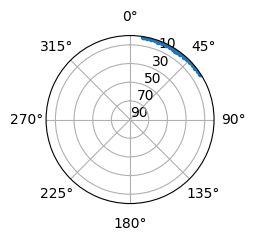

AOS      2023-06-18T08:44:44.223334 UTC   328.74     0.00    2332.49   -6721.92
MAX      2023-06-18T08:50:00.738455 UTC    47.29    37.02     651.96      -2.54
LOS      2023-06-18T08:55:16.499929 UTC   125.63    -0.00    2329.24    6735.66


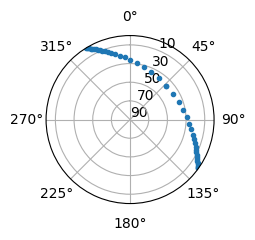

AOS      2023-06-18T10:22:11.611694 UTC   287.92     0.00    2331.62   -5345.10
MAX      2023-06-18T10:26:22.211904 UTC   236.45     9.33    1514.60      -7.30
LOS      2023-06-18T10:30:33.047397 UTC   184.80    -0.00    2327.59    5315.15


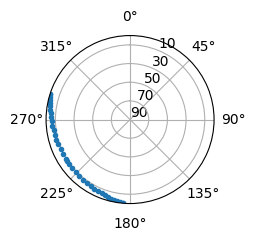

AOS      2023-06-18T22:08:57.173718 UTC   160.39     0.00    2329.52   -4118.92
MAX      2023-06-18T22:12:13.631554 UTC   122.32     4.54    1880.16       7.74
LOS      2023-06-18T22:15:29.814236 UTC    84.37    -0.00    2332.64    4147.61


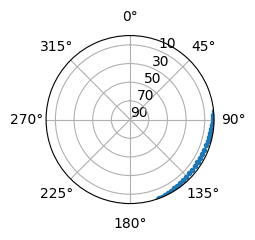

AOS      2023-06-18T23:43:05.712382 UTC   224.26     0.00    2330.42   -6897.42
MAX      2023-06-18T23:48:27.960362 UTC   310.72    67.26     445.40       1.64
LOS      2023-06-18T23:53:50.765089 UTC    37.41    -0.00    2333.44    6891.23


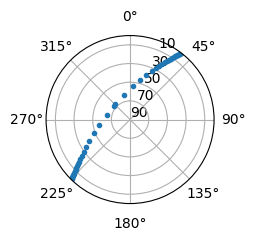

In [17]:
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
 
import sys
import numpy as np
import matplotlib.pyplot as plt

tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()
azims, elevs = [], []
#print(repr(tle))

station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
 


# checkAOS = StationSignalListener(station,0).info(tle)
# print(checkAOS)
# check = StationMaskListener(station=station).check(tle)
# print(check)
 

for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=24), step=timedelta(seconds=15), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    

    if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        print("{event:7}  {orb.date}  {azim:7.2f}  {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
        orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
        ))
      
    if orb.event and orb.event.info.startswith("LOS"):
        plt.figure()
        ax = plt.subplot(223, projection='polar')   
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        plt.plot(np.radians(azims), elevs, '.')
        ax.set_yticks(range(0, 90, 20))
        ax.set_yticklabels(map(str, range(90, 0, -20)))
        ax.set_rmax(90)   
        
        if "no-display" not in sys.argv:
            plt.show()
        
        azims.clear()
        elevs.clear()
        

        
        

# plt.figure()
# ax = plt.subplot(111, projection='polar')
# ax.set_theta_direction(-1)
# ax.set_theta_zero_location('N')
# plt.plot(np.radians(azims), elevs, '.')
# ax.set_yticks(range(0, 90, 20))
# ax.set_yticklabels(map(str, range(90, 0, -20)))
# ax.set_rmax(90)

# if "no-display" not in sys.argv:
#     plt.show()
 

In [32]:
from beyond.dates import Date, timedelta
print(Date.now())
print(timedelta(hours=24))
print(Date(2023, 6, 18, 00, 00, 00) )

2023-06-15T20:10:53.416492 UTC
1 day, 0:00:00
2023-06-18T00:00:00 UTC


In [19]:
from datetime import datetime
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal

local_timezone = tzlocal.get_localzone() # get pytz tzinfo
utc_time = datetime.strptime("2011-01-21 02:37:21", "%Y-%m-%d %H:%M:%S")
local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)

print(utc_time , local_time)

2011-01-21 02:37:21 2011-01-21 08:07:21+05:30


In [34]:
 
import sys
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station


tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

azims, elevs = [], []
 
local_timezone = tzlocal.get_localzone() 

 
station = create_station('BPL', (23.2599333, 77.4126149, 495.23))
 
for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=2), step=timedelta(seconds=15), events=(True)):

    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360

    azims.append(azim)
    elevs.append(90 - elev)   

    r = orb.r / 1000.
    
    if orb.event and orb.event.info.startswith('AOS') :
        
        print("         Date         Time          Azim      Elev      Distance   Radial Velocity")
        print("==================================================================================") 

    if orb.event and orb.event.info.startswith('AOS') or orb.event and orb.event.info.startswith('LOS') or orb.event and orb.event.info.startswith('MAX')    :
        
        
        str1 = orb.date.strftime("%m/%d/%Y  %H:%M:%S")
        utc_time = datetime.strptime(str1 , "%m/%d/%Y  %H:%M:%S")
        local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)
          
        _date = local_time.strftime("%m/%d/%Y")
        _time = local_time.strftime("%H:%M:%S")
          
        
        print("{event:7} | {date} | {time}  | {azim:7.2f} | {elev:7.2f} | {r:10.2f} | {orb.r_dot:10.2f}".format(
        orb=orb, r=r, date = _date , time = _time,azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
        ))
      
    if orb.event and orb.event.info.startswith("LOS"):
       
        pass

        

A frame with the name 'BPL' is already registered. Overriding


         Date         Time          Azim      Elev      Distance   Radial Velocity
AOS     | 06/18/2023 | 06:02:27  |  239.12 |    0.00 |    2330.67 |   -6606.63
MAX     | 06/18/2023 | 06:07:38  |  313.69 |   29.19 |     777.05 |       2.31
LOS     | 06/18/2023 | 06:12:49  |   28.45 |   -0.00 |    2333.24 |    6590.36


In [27]:
import sys
import json
import pandas as pd
import pytz    # $ pip install pytz
import tzlocal # $ pip install tzlocal
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station

tle = Tle("""ISS (ZARYA)
1 25544U 98067A   23166.18443237  .00010989  00000+0  19492-3 0  9994
2 25544  51.6399 338.4530 0005180  82.1865 277.9712 15.50766000401487""").orbit()

azims, elevs = [], []
local_timezone = tzlocal.get_localzone() 
station = create_station('BPL', (0.9102, 90.9955, 100))
counter = 0 
predictedpath = []
flag = False 

for orb in station.visibility(tle, start=Date(2023, 6, 18, 00, 00, 00), stop=timedelta(hours=24), step=timedelta(seconds=90), events=(True)):


    elev = np.degrees(orb.phi)
    azim = np.degrees(-orb.theta) % 360
    
    r = orb.r / 1000.
    
    str1 = orb.date.strftime("%m/%d/%Y  %H:%M:%S")
    utc_time = datetime.strptime(str1 , "%m/%d/%Y  %H:%M:%S")
    local_time = utc_time.replace(tzinfo=pytz.utc).astimezone(local_timezone)
      
    _date = local_time.strftime("%m/%d/%Y")
    _time = local_time.strftime("%H:%M:%S")

    path = {
        "event" :  orb.event.info if orb.event is not None else "",
        "date" : _date , 
        "time" :_time,
        "azim":azim, 
        "elev":elev ,
        "distance" : r , 
        "radialvelocity" :orb.r_dot 
      }         
    
    predictedpath.append(path)

df = pd.DataFrame(predictedpath) 
 
# Assuming the given data is stored in a DataFrame named 'df'
grouped_data = []
group_start = 0
group_id = 0

for i in range(len(df)):
    event = df.loc[i, 'event']
    
    if event == 'AOS':
        group_end = i
        
        if group_start != group_end:
            # Extract the data between start and end indices
            group_data = df.loc[group_start:group_end-1].copy()
            group_data.loc[:, 'group_id'] = group_id
            grouped_data.append(group_data)
        
        # Start a new group
        group_start = i
        group_id += 1

# Check if there is remaining data after the last group start
if group_start < len(df):
    group_data = df.loc[group_start:].copy()
    group_data.loc[:, 'group_id'] = group_id
    grouped_data.append(group_data)

# Print the grouped data with a unique identifier for each group
for group in grouped_data:
    print(f"Group ID: {group['group_id'].iloc[0]}")
    print(group)
    print()

grouped_df = pd.concat(grouped_data)
grouped_df.to_csv("predictedPath.csv", sep='\t', index=False)



A frame with the name 'BPL' is already registered. Overriding


Group ID: 1
  event        date      time        azim       elev     distance   
0   AOS  06/18/2023  14:22:00  346.765898   0.000001  2324.511916  \
1        06/18/2023  14:22:30  349.213848   1.751838  2138.611638   
2        06/18/2023  14:24:00  359.972396   7.920808  1609.683521   
3        06/18/2023  14:25:30   20.306299  15.436059  1186.065821   
4   MAX  06/18/2023  14:26:56   54.215259  19.908338  1016.103081   
5        06/18/2023  14:27:00   55.673440  19.900245  1016.446340   
6        06/18/2023  14:28:30   89.998540  14.902287  1214.479593   
7        06/18/2023  14:30:00  109.212212   7.477344  1651.937302   
8        06/18/2023  14:31:30  119.373626   1.435051  2187.203228   
9   LOS  06/18/2023  14:31:54  121.312511  -0.000002  2342.138645   

   radialvelocity  group_id  
0    -6291.032343         1  
1    -6171.212200         1  
2    -5474.458904         1  
3    -3655.370575         1  
4       22.172804         1  
5      185.758389         1  
6     3883.998240 

In [1]:
import pandas as pd

name_dict = {
            
          }

df = pd.DataFrame(name_dict)

print (df)

  Name  Score
0    a     90
1    b     80
2    c     95
3    d     20
